# Bike Analysis and Demand Prediction for Washington, DC

![Capitol Hill, Washington, DC, USA](images/washington-dc.jpeg)

In [1]:
# Import packages
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme()
sns.set_palette('colorblind')

## EDA

We’ll start off by importing and loading the data into a data frame.

In [3]:
# Import data
dc_bikes = pd.read_csv('data/finaldata.csv', parse_dates=["date"])

The data is already clean and preprocessed, we have not missing values nor duplicates. Still, we’d like to add weather labels in order to visualize them later.

In [26]:
def labeling(awnd, prcp, snow, snwd):
    if prcp > 0.0:
        label = 'rain'
    elif snow > 0.0 or snwd > 0.0:
        label = 'snow'
    elif awnd >= 6.0:
        label = 'wind'
    else:
        label = 'sun'
    return label
    
dc_bikes['weather'] = dc_bikes.apply(lambda x: labeling(x.awnd, x.prcp, x.snow, x.snwd), axis=1)

### Visualizations

Next, we’ll have a look at the distribution of the data.


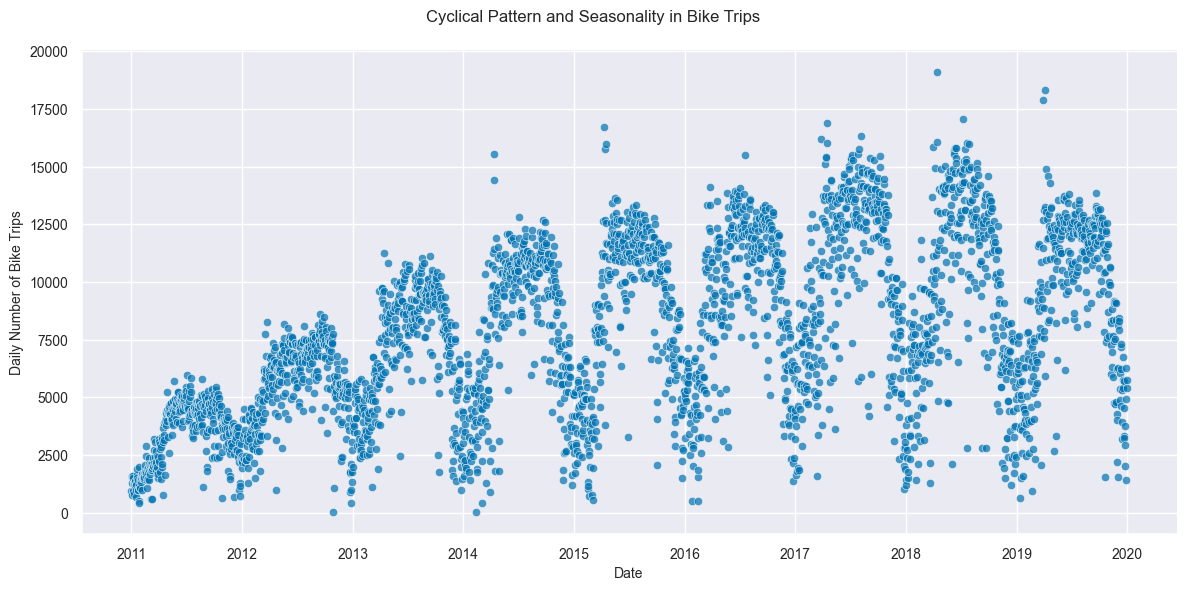

In [27]:
# Plot Number of Daily Bike Usage (2011-2019)
sns.relplot(
    data=dc_bikes,
    x='date',
    y='numbikes',
    height=6,
    aspect=2,
    #color='blue',
    alpha=.7)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Daily Number of Bike Trips', fontsize=10)
plt.suptitle('Cyclical Pattern and Seasonality in Bike Trips', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout(pad=1)
plt.show()
#plt.savefig('images/cyclical-patterns.png')

We can clearly make out the cyclical and seasonal nature of the data. Bike trips are taken a lot more during summertime and rentals die down in the fall and winter months. Also of note are regular peaks which seem to happen each year in April. Let’s have a look into what’s going on here.

In [29]:
dc_bikes.loc[list(dc_bikes.groupby('year').numbikes.idxmax()),['date','numbikes','tmax','weather']]

,date,numbikes,tmax,weather
184,2011-07-04,5975,32.8,sun
623,2012-09-15,8623,25.6,sun
833,2013-04-13,11267,21.1,sun
1197,2014-04-12,15564,25.0,sun
1561,2015-04-11,16746,20.0,sun
2020,2016-07-17,15526,33.9,sun
2292,2017-04-15,16896,25.0,sun
2656,2018-04-14,19113,29.4,sun
3017,2019-04-06,18346,21.7,sun


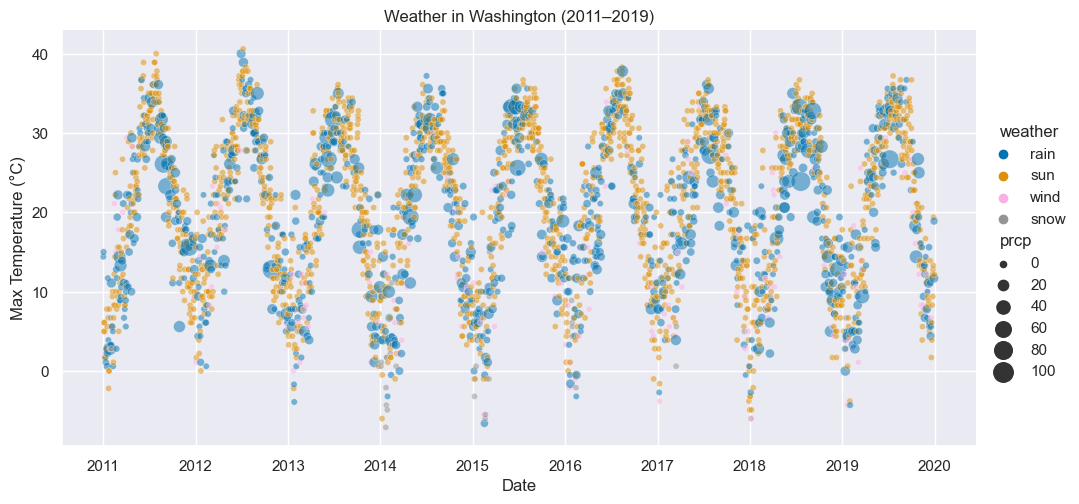

In [28]:
palette = {'sun':"#de8f05", 'wind':"#fbafe4", 'rain':'#0173b2', 'snow':"#949494"}

sns.relplot(
    data=dc_bikes,
    x="date", 
    y="tmax", 
    size="prcp", # set size of data points to amount of precipitation
    sizes=(20,200),
    hue='weather', 
    palette=palette,
    aspect=2,
    alpha=.5
)

plt.xlabel("Date")
plt.ylabel("Max Temperature (°C)")
plt.title("Weather in Washington (2011–2019)")

plt.show();

In [18]:
#ç.groupby('year').numbikes.mean().reset_index()

# Bike Trips by Year, Month, Week, Day of the Week 
avg_bikes_year = dc_bikes.groupby('year')['numbikes'].mean().reset_index()
avg_bikes_month = dc_bikes.groupby('month')['numbikes'].mean().reset_index()
avg_bikes_week = dc_bikes.groupby('week')['numbikes'].mean().reset_index()
avg_bikes_day = dc_bikes.groupby('dayofweek')['numbikes'].mean().reset_index()
avg_bikes_day = avg_bikes_day.rename({'dayofweek': 'day'}, axis=1)

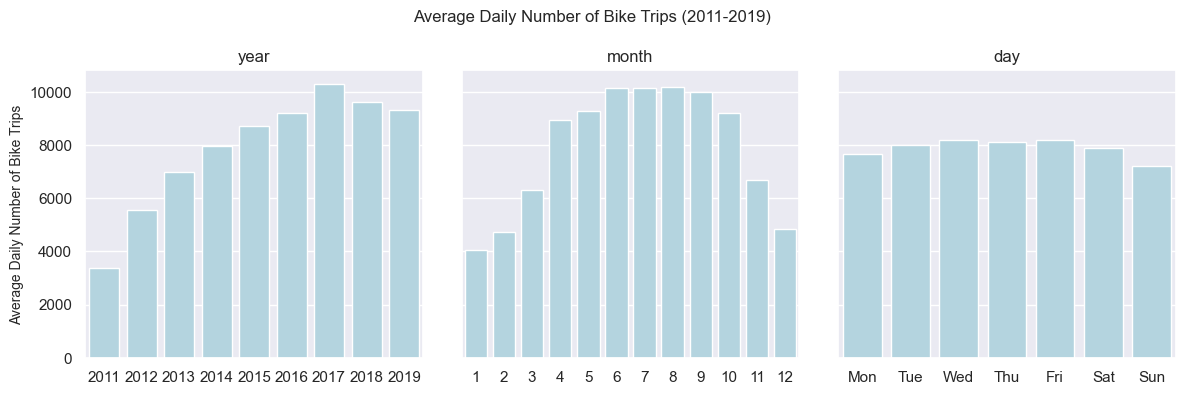

In [20]:
# Average Daily Number of Bike Trips by Year (2011-2019)
fig, ax = plt.subplots(1,3, figsize=(12,4), sharey=True)
fig.suptitle('Average Daily Number of Bike Trips (2011-2019)', fontsize=12)
avg_bikes_df = [avg_bikes_year, avg_bikes_month, avg_bikes_day]
count = 0
for item in avg_bikes_df:
    sns.barplot(data=item, 
                x=item.iloc[:,0],
                y='numbikes',
                ax=ax[count],
                color='lightblue').set(title=f'{item.columns[0]}', xlabel='')
    count += 1
fig.tight_layout(pad=1)

# Some axis customization on graph
ax[0].set_ylabel('Average Daily Number of Bike Trips', fontsize=10)
ax[1].set_ylabel('')
ax[2].set_ylabel('')
ax[2].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

plt.show()

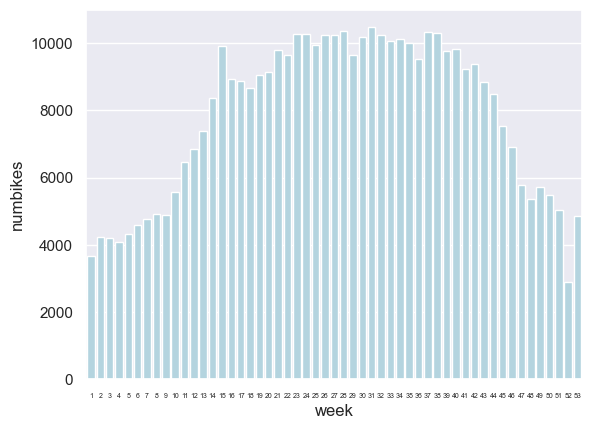

In [ ]:
sns.barplot(
    data=avg_bikes_week,
    x="week",
    y="numbikes",
    color='lightblue'
    #palette=("Blues")
)
plt.xticks(fontsize=5)
plt.show();

Text(0.5, 1.0, 'Correlation Matrix for Weather Features')

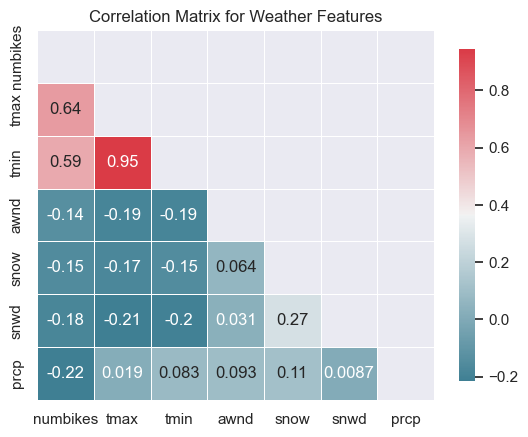

In [11]:
# checking for relationships among the features and between the features and the target
corr_mtrx = dc_bikes[['numbikes','tmax','tmin','awnd','snow','snwd','prcp']].corr()

mask = np.triu(corr_mtrx)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr_mtrx, annot=True, mask=mask, cmap=cmap, linewidths=.5, cbar_kws={"shrink": .9});
plt.title('Correlation Matrix for Weather Features')

In [12]:
dc_bikes.groupby('year').numbikes.mean()

year
2011     3361.005479
2012     5543.472678
2013     7001.482192
2014     7981.232877
2015     8728.509589
2016     9209.928177
2017    10295.279452
2018     9600.769648
2019     9310.731507
Name: numbikes, dtype: float64